In [23]:
# Linear algebra and data handling
import numpy as np
import pandas as pd


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1.5)
sns.set(color_codes=True)

# Extension to speed calculation (X10-100)
# from sklearnex import patch_sklearn

# patch_sklearn()

In [12]:
y_train

0       4.585025
1       7.742321
2       5.999957
3       7.419075
4       7.300162
          ...   
3515    6.938925
3516    6.999566
3517    8.387216
3518    6.817871
3519    8.207608
Name: y, Length: 3520, dtype: float64

In [14]:
y_train_predict['y'].ravel()

array([8.63994312, 5.29193926, 6.345891  , ..., 6.83178282, 7.82126045,
       5.15406847])

In [31]:
x_train = pd.read_csv("../data/raw_data/fixed_train_data.csv")
y_train = x_train["y"]
x_test = pd.read_csv("../data/raw_data/fixed_test_data.csv")
y_test = x_test["y"]
x_train = x_train.drop(columns=["y", "Unnamed: 0"])
x_test = x_test.drop(columns=["y", "Unnamed: 0"])
y_train_predict = pd.read_csv(
    "/Users/emanieluu/Documents/ENSAE/3A/Advanced Machine Learning/aml_project/data/predictions/GIN_predictions/predictions_train_bis.csv",
    index_col=0,
)
y_test_predict = pd.read_csv(
    "/Users/emanieluu/Documents/ENSAE/3A/Advanced Machine Learning/aml_project/data/predictions/GIN_predictions/predictions_test_bis.csv",
    index_col=0,
)

In [32]:
x_test

,smiles
0,COCCNc1ccc(-c2ccn3c(-c4cccc(NC(=O)NCC(F)(F)F)c...
1,CCOC1CCCN(Cc2ccc3c(c2)NC(=O)c2c(Nc4cc(O)c(C)cc...
2,Cc1ccc(-c2nnc(Nc3ccc(Cl)cc3)c3ccccc23)cc1
3,COc1cc(C2=C(c3cn(C)c4ccccc34)C(=O)NC2)cc(OC)c1OC
4,COc1cc2c(NC3=CC(=O)C(OCC(F)F)=CC3=O)ncnc2cc1OC...
...,...
875,COCCN1CCN(c2cc(Nc3ncc(C#N)s3)ncn2)CC1
876,CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(F...
877,NS(=O)(=O)c1ccc(Nc2ncc(-c3ccc(=O)[nH]c3)o2)cc1
878,Cc1ccc(NC(=O)c2cccc(C(F)(F)F)c2)cc1Nc1nc2ccccc...


In [33]:
from sklearn.metrics import (
    mean_absolute_error,
    median_absolute_error,
    classification_report,
    mean_squared_error,
)

In [34]:
mae_train = mean_absolute_error(y_train, y_train_predict)
mae_test = mean_absolute_error(y_test, y_test_predict)

In [35]:
mae_train

1.458104432447848

In [36]:
mae_test

1.3734310434749766

NameError: name 'text' is not defined

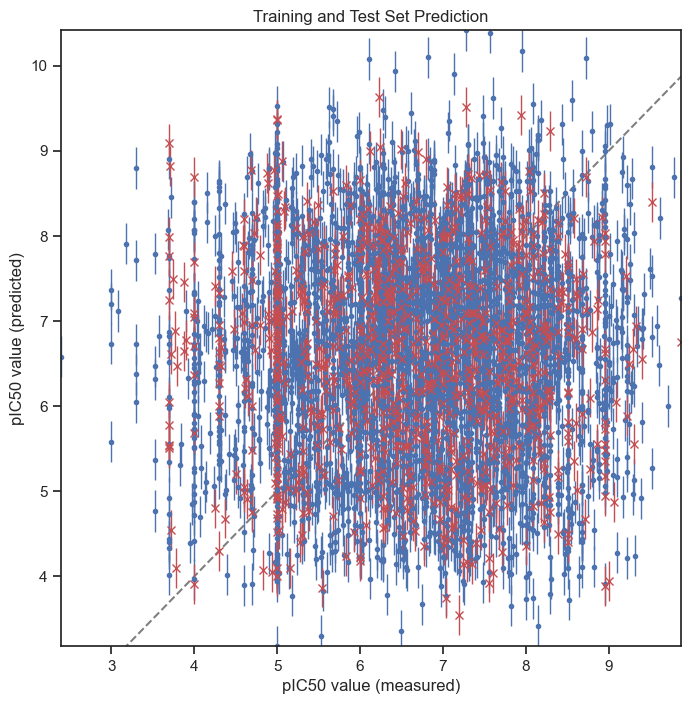

In [30]:
with sns.axes_style("ticks"):
    fig, ax = plt.subplots(figsize=(8, 8))

    ax.set_xlim([np.min(y_train), np.max(y_train)])
    ax.set_ylim([np.min(y_train_predict), np.max(y_train_predict)])

    ax.errorbar(
        y_train,
        y_train_predict["y"].ravel(),
        fmt=".",
        label="Train",
        lw=1.0,
        capsize=0,
        yerr=0.2 * y_train_predict.std(),
    )
    ax.errorbar(
        y_test,
        y_test_predict["y"].ravel(),
        fmt="x",
        color="r",
        markeredgewidth=1.0,
        label="Test",
        lw=1.0,
        capsize=0,
        yerr=0.2 * y_test_predict.std(),
    )

    ax.plot([-50, 110], [-50, 110], "--", zorder=0, color="gray")

#     mae_train = mean_absolute_error(y_train, y_train_predict)
#     mae_test = mean_absolute_error(y_test, y_test_predict)

    ax.set_title("Training and Test Set Prediction")
    ax.set_ylabel("pIC50 value (predicted)")
    ax.set_xlabel("pIC50 value (measured)")

#     text = (
#         "MAE (Train): {:.2f}".format(mae_train)
#         + "\n"
#         + "MAE (Test): {:.2f}".format(mae_test)
#     )

    ax.text(0.05, 0.95, text, transform=ax.transAxes, ha="left", va="top")

    ax.legend(loc="lower right")

    sns.despine()
    fig.tight_layout()

    # fig.savefig('y_prediction.png', transparent=True)